In [1]:
import import_ipynb as ipynb
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from common import sns_cm, display_accuracy

In [2]:
%%capture
knn = ipynb.NotebookLoader().load_module('knn')

#### Now we continue with the decision tree. You should use the decision tree classifier you find in scikit-learn.

##### Use the gridsearchCV as you did for KNN. As hyperparameters use max_depth and criterion. Use accuracy as previously

In [3]:
dt = DecisionTreeClassifier()

##### hyperparameters

In [4]:
param_grid = {
    'max_depth': list(range(1, 50)),
    'criterion': ['gini', 'entropy']
}

In [5]:
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    cv=knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

##### Create model

In [6]:
grid.fit(knn.X_train, knn.y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

##### Scores

In [7]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [8]:
grid.best_score_

1.0

##### Does the criterion have an impact on the accuracy? Make an investigation so you can answer this question
Gini(max_depth = 1) ~ 0.6 
Entropy(max_Depth = 1) = 1.0
Rest of the fits are over-fitting.

In [9]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004793,0.000590,0.000825,0.000455,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.693252,0.625767,0.705521,...,0.646154,0.670769,0.609231,0.636923,0.667692,0.695385,0.695385,0.6685,0.031155,97
1,0.005585,0.000659,0.000762,0.000538,gini,2,"{'criterion': 'gini', 'max_depth': 2}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
2,0.005461,0.000568,0.000841,0.000462,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
3,0.005227,0.000420,0.000907,0.000350,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
4,0.005177,0.000346,0.000851,0.000450,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.005451,0.000440,0.000921,0.000365,entropy,45,"{'criterion': 'entropy', 'max_depth': 45}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
94,0.005240,0.000405,0.000846,0.000356,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
95,0.005320,0.000519,0.000757,0.000541,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1
96,0.005332,0.000357,0.000812,0.000508,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1


##### Plot the tree with the optimal hyperparameters

[Text(0.6, 0.8333333333333334, 'ax <= -1.018\ngini = 0.667\nsamples = 6513\nvalue = [2230, 2156, 2127]\nclass = Standing_up'),
 Text(0.4, 0.5, 'ax <= -2.365\ngini = 0.5\nsamples = 4283\nvalue = [0, 2156, 2127]\nclass = Sitting'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2127\nvalue = [0, 0, 2127]\nclass = Laying_down'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2156\nvalue = [0, 2156, 0]\nclass = Sitting'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2230\nvalue = [2230, 0, 0]\nclass = Standing_up')]

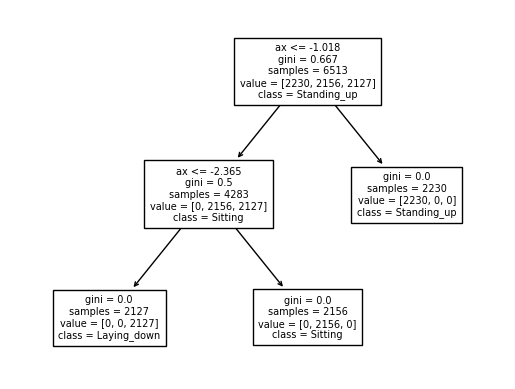

In [10]:
plot_tree(
    decision_tree=grid.best_estimator_,
    feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],
    class_names=knn.stationary_positions,
    fontsize=7,
    max_depth=3
)

##### Sitting and laying_down are similar as seen in the KNN scatter plot, hence the gini = 50% (which is why it went down the node below). However, Distinguishing standing and sitting is easy as they are significantly distant from each other in the KNN scatter plot. 'ax' is the most useful feature for classification. 

#### Now it is time you look at the test set.

##### Using the tree-model above to predict the accuracy.
100% since, the decision tree is able to classify all classes regardless of the depth.

In [11]:
y_pred = grid.predict(X=knn.X_test)

In [12]:
accuracy_score(y_true=knn.y_test, y_pred=y_pred)

1.0

#### Plot the confusion matrix as well

#### Validation set

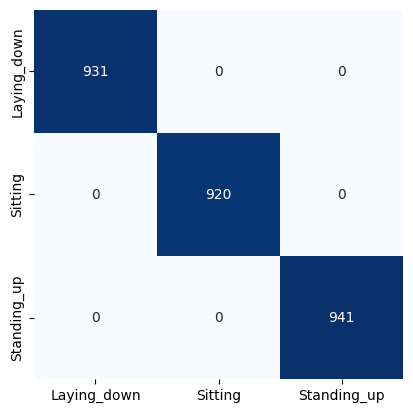

In [13]:
sns_cm(knn.y_test, y_pred)

##### Test set

In [14]:
dt_y_test_pred = grid.predict(X=knn.X_test_sample)

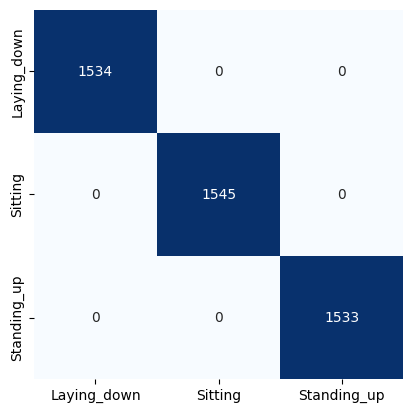

In [15]:
sns_cm(knn.y_true_sample, dt_y_test_pred)

##### Explain the difference between the accuracy for the validation set and the test set
100% accuracy. In this case, over-fitting is reliable.

##### Explain the result you see in the confusion matrix
100% accuracy

In [16]:
display_accuracy(accuracy_score(y_true=knn.y_test, y_pred=y_pred), accuracy_score(y_true=knn.y_true_sample, y_pred=dt_y_test_pred))

Validation set accuracy: 1.0
Test set accuracy: 1.0


#### As a last step, it is time to compare the results from the KNN-model and the decision tree.

##### What is the difference between the accuracies?
The same

##### Mean Score time
Decision tree 10x faster than knn
mean score time:
    knn ~ 0.066
    decision_tree ~ 0.005 

##### What is the difference between the confusion matrices?
None